# Assignment #4 - Reinforcement Learning
### DUE: Apr 16 (Tuesday) 11:00 pm 
### DHANANJAY ARORA

# I. Overview

Reinforcement learning (RL) is an area of machine learning concerned with how software agents ought to take actions in an environment so as to maximize some notion of cumulative reward. Reinforcement learning is considered as one of three machine learning paradigms, alongside supervised learning and unsupervised learning.

Reinforcement learning requires clever exploration mechanisms. Randomly selecting actions, without reference to an estimated probability distribution, shows poor performance. However, due to the lack of algorithms that scale well with the number of states (or scale to problems with infinite state spaces), simple exploration methods are the most practical.

The objective of this assignment is to learn more about reinforcement learning by implementing a reinforcement agent to play the Blackjack game. Implementation and its explanation is discussed below.

- The objective of this assignment is to implement reinforcement learning to solve BlackJack problem using the best out of Q-learning or SARSA learning. 
- A relevant model for the problem is selected and implemented. 
- Experimenting this model with various parameters is done and corresponding results are plotted. 
- The ones which gives optimum output are selected and used for the final model training. 
- The results are plotted and necessary inferences are made.

# Methods

### Review of the SARSA and Q-Learning

- **State–action–reward–state–action (SARSA)** is an algorithm for learning a Markov decision process policy, used in the reinforcement learning area of machine learning.


- **Q-learning** is a model-free reinforcement learning algorithm. 
- The goal of Q-learning is to learn a policy, which tells an agent what action to take under what circumstances. 
- It does not require a model (hence the connotation "model-free") of the environment, and it can handle problems with stochastic transitions and rewards, without requiring adaptations.


- Both of these algorithms updates the values of the Q table.
- The matrix for all the possibilities with particular actions are stored.


- In Q-learning algorithm, if we start at first state, perform some action and get some reward, and then look what is the maximum reward for an action is in the next state, and uses it to update action value for performing the first action in the first state. In SARSA, we use the action that is taken in previous state.


- In SARSA, at first we update Q. A certain behavior policy is followed and it is called on-policy control. 
Given below is the formula used to update Q in SARSA

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$

- In Q-learning, we do not make assumption of behavior policy. Thus this is called as off-policy control. 
- Given below is the formula used to update Q in Q-learning

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$

- The major difference is that Q-learning uses the action with maximum reward to update the action value. 
In SARSA, at first an action is taken. 

### Choice of TD learning and Reason

- I have chosen Q-learning algorithm for solving this problem because I want to use the updated values for the next iteration instead of using the same action, considering this action with maximum value would make us reach the goal faster.
- Q Learning learns faster than SARSA.
- Q- learning won't take much time to find the maximum win percentage as the number of computations are less.
- Therefore, I inferred that Q learning would be the best algorithm for this problem.
- Moreover, it gives more efficient result as it keeps on trying to enhance the win percentage.

### Choice of Function Approximation and Reason

- There are several function approximation from which we can choose from, such as linear, tabular approximation and Neural Network Function Approximation.
- I picked linear function approximation to solve BlackJack problem.
- I have picked the linear because this function approximation is better for problems which have finite state and action space.
- Moreover, the Monte Carlo method can be used to implement the approximation. 
- Moreover in Monte Carlo, we play an episode of the game, move epsilon-greedly through out the states till the end, record the states, actions and rewards that we encountered then compute the V(s) and Q(s) for each state we passed through.
- We repeat this process by playing more episodes and after each episode we get the states, actions, and rewards and we average the values of the discovered V(s) and Q(s).
- It learns optimal behavior directly from its interaction with the environment. Moreover, it does not require a model of the environment’s dynamics.

References(https://danieltakeshi.github.io/2016/10/31/going-deeper-into-reinforcement-learning-understanding-q-learning-and-linear-function-approximation/ and http://papers.nips.cc/paper/1713-policy-gradient-methods-for-reinforcement-learning-with-function-approximation.pdf)

# II. Problems 



## Blackjack

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG" width=800 />

Now, we play Blackjack! 
We have improved version of it from OpenAI Gym [Blackjack-V0](https://gym.openai.com/envs/Blackjack-v0/). Our blackjack has an additional betting option. Here follows the rule description. 


### <font color="red"> Game Introduction and Rules: </font>


Blackjack is a card game where the goal is to obtain cards that sum to as
near as possible to 21 without going over.  They're playing against a fixed
dealer.

Face cards (Jack, Queen, King) have point value 10.
Aces can either count as 11 or 1, and it's called 'usable' at 11.
This game is placed with an infinite deck (or with replacement).

The game starts with each player getting two face up cards and dealer
having one face up and face down card and the player needs to bet an 
amount of money within range of 1 to max bet (10). 
Note: Face up means that you will know what the card is.

The player can request additional cards (hit=1) until they decide to stop
(stick=0) or exceed 21 (bust).

After the player sticks, the dealer reveals their facedown card, and draws
until their sum is 17 or greater (fixed policy).  If the dealer goes bust the player wins.
You won't see the dealer's facedown card, just you will know if you have or lost
and you will get appropriate reward of +1 if you win, -1 if you loose or 0 if the match
is drawn.
(It is freedom of choice for you to change the reward function. If you want to change, you should explain the reason of the change.)

If the player wins, the amount he has bet will be doubled and given back. 
If the player and dealer have the same sum, then its a draw and the player will get
back the money he has bet. 
If the player loses then, the money he bet will be lost. 
If neither player nor dealer busts, the outcome (win, lose, draw) is
decided by whose sum is closer to 21. You are free to change the reward function to make it 
learn more efficiently. (i.e.,  the amount of money the user is winning after each round). 

Regardless of the number of players on the table, each player will be just playing against the 
dealer independently of the other players.

## BlackJack Environment

In [1]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym
from gym import spaces
from gym.utils import seeding
from collections import defaultdict

### Explanation of the code

Below is the explanation of the code in the order in which each functionality is implemented:

### Player class definition

Player class defines an object for each BlackJack player with a given *unique* name. It has three attributes, the player's name, current cards in hand, and total balance left to play games.  <code>get_info()</code> is getter method that prints out all three attributes.

In [2]:
class Player():
    """
        
        Player class to create a player object.
        eg: player = Player("player1", start_balance = 10)
        Above declaration will be for your agent.
        All the player names should be unique or else you will get error.
        
    """
    def __init__(self, player_name, start_balance = 10):
        self.player_name = player_name
        self.card = []
        self.starter_balance = start_balance
        self.total_balance = start_balance

    def recharge_account(self):
        self.total_balance = self.starter_balance
        
    def get_info(self):
        print("Player name: {}".format(self.player_name))
        print("Player card: {}".format(self.card))
        print("Player total_balance: {}".format(self.total_balance))     

# Blackjack (OpenAI Gym)

### def cmp(a, b):

Gives a positive value when a is greater than b and returns a negative value when b is greater than a 

### def draw_card(np_random):

Generates a random card from the deck

### def draw_hand(np_random):
Generates two random cards. This is used at the beginning of the game

### def usable_ace(hand):  # Does this hand have a usable ace?
Verifies whether the player contains a usable_ace. i.e., Ace that can be used as 11.

### def sum_hand(hand):
Gives the sum of total cards of player

### def is_bust(hand):
Verifies whether the player has busted. i.e., whether the sum of hand greater than 21

### def score(hand):  # What is the score of this hand (0 if bust)
Returns sum of cards of a player if the sum is less than or equal to 21. Or else returns 0.    

### def is_natural(hand):
Verifies whether the player wins at the very beginning of the game (i.e., when he is assigned two cards)

## class BlackjackEnv(gym.Env):
### def __init__(self, natural=False):
Creates memory based on number of actions with and possible cases and starts the first game. It even assigns natural variable which is used to verify a win without even taking an action.


### def step(self, action):
Move one step forward by selecting hit or stick. If hit is selected, we need to verify whether bust has occured and update done variable. Returns the observation, reward for the action and whether the game is completed or not.
        

### def _get_obs(self):
Returns the particular observation with sum, dealr card and boolean value whether it is an usable ace
        
### def reset(self):
Restart the game by assigning both the dealer and player with two cards


In [3]:
# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

def cmp(a, b):
    return float(a > b) - float(a < b)

def draw_card(np_random):
    return int(np_random.choice(deck))

def draw_hand(np_random):
    return [draw_card(np_random), draw_card(np_random)]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]

### Game Environment

The Blackjack game environment is defined as follows. Inheriting, OpenAI.Gym.Env, it overrides the interfances to enable the interfaction with the same interfaces with other OpenAI Gym environments. 

These are important member functions to be used by you:
1. add_player: You can add your player object with some initial amount of money

2. step: you need to send the action using this function, actions are hit(1) or stand(0)
        returns {'state': player info and dealer info (_get_obs), 
                 'reward': real-valued reward, 
                 'is_round_done': True/Fasle}
3. _get_obs: returns the state of the env or required information you can use to build your agent. 
             eg: {'player_info':{'player_sum_card': sum of cards, 
                                 'player_card': list of cards, 
                                 'player_total_balance': real-valued number, 
                                 'usable_ace' : True/False}, 
                 'dealer_info': dealer's first card}
4. init_round: will start a new round in the same game.
        returns {'state': player info and dealer info (_get_obs)}
          
5. reset: will reset the whole game and you will being again with the initial balance you had started the player object.
        returns nothing, will just reset the entire game.
          
6. bet_money: you can bet the amount using this method, takes in the money between (1, max_bet_cap). max_bet_cap is 10. 
        returns nothing.

Print statements are commented to make the notebook run faster. It can be uncommented if you want to check the results.

In [4]:
class BlackjackEnv(gym.Env):
    """
    Simple blackjack environment
    
    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with each (player and dealer) having one face up and one
    face down card.
    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).
    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.
    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.
    The observation is: the players current sum, players current card, players balance left, 
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).
    
    Parameters
    ==========
    natural      boolean
                 option for 50% more reward on natural blackjack 
    
    """
    
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32),
            spaces.Discrete(11),
            spaces.Discrete(2)))
        self.seed()
        self.total_players = 1
        self.players = {}
        self.natural = natural
        self.dealer = []
        self.round_bet_info = {}
        self.max_bet_cap = 10

    def add_player(self, player_class):
        if player_class not in self.players and len(self.players) < self.total_players:
            self.players[player_class.player_name] = player_class
        else:
            raise Exception("Maximum number of player allowed: {}. You can increase the player count while initializing the environment".format(len(self.players)))

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, player_name, action):
        assert self.action_space.contains(action)
        if action:  # hit: add a card to players hand and return
            self.players[player_name].card.append(draw_card(self.np_random))
            if is_bust(self.players[player_name].card):
                done = True
                reward = -1
            else:
                done = False
                reward = 0
        else:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card(self.np_random))
            reward = cmp(score(self.players[player_name].card), score(self.dealer))
            if self.natural and is_natural(self.players[player_name].card) and reward == 1:
                reward = 1.5
        if done:
            self.settle_balance(int(reward), player_name)
        return {'state':self._get_obs(player_name), 'reward': reward, 'is_round_done': done}

    def _get_obs(self, player_name):
        return {'player_info':self.get_player_obs(player_name), 
                'dealer_info': self.dealer[0]}

    def get_player_obs(self, player_name):
        return {'player_sum_card':sum_hand(self.players[player_name].card), 
                'player_card':self.players[player_name].card, 
                'player_total_balance':self.players[player_name].total_balance, 
                'usable_ace' : usable_ace(self.players[player_name].card)}
    
    def get_valid_bet_amount(self, player_name):
        #print("player name: {} money left: {}".format(player_name, self.players[player_name].total_balance))
        if self.players[player_name].total_balance < 1:
            return {'is_round_done': True, 'valid_bet_amount': -1}
        max_bet_upper_limit = self.players[player_name].total_balance
        if self.players[player_name].total_balance >= self.max_bet_cap:
            max_bet_upper_limit = self.max_bet_cap            
        return {'is_round_done': False, 'valid_bet_amount': list(range(1, max_bet_upper_limit+1))}
            
    def init_round(self, player_name):         
        self.dealer = draw_hand(self.np_random)
        self.players[player_name].card = draw_hand(self.np_random)
        return {'state': self._get_obs(player_name)}        

    def bet_money(self, player_name, bet_amount):
        self.players[player_name].total_balance -= bet_amount
        self.round_bet_info[player_name] = bet_amount
            
    def settle_balance(self, is_winner, player_name):
        if is_winner == 1:
            #print("player winner")
            self.players[player_name].total_balance += (2 * self.round_bet_info[player_name])
        elif is_winner == 0:
            #print("Draw match")
            self.players[player_name].total_balance += self.round_bet_info[player_name]
        #else:
            #print("player loser, wont get back the money, try next round")
    
    def reset(self, natural=False):
        for player_name, player_class in self.players.items():
            player_class.recharge_account()
        self.natural = natural
        self.dealer = []
        self.round_bet_info = {}

### Implementation of the selected approach (RLAgent)

- def _init_(self, env): Initialise Q-Table

- greedy(self, Q, state): Performs Greedy action selection

- epsilon_greed(self, epsilon, state): Performs Epsilon greed function

- sliceState(self,state): Split the state so that it can be used for updating Q-table. Also, maintaining the following things:
 - player card sum
 - dealer card info
 - usable ace 
 to store in Q-table.

- train(self,player1, **params): gamma, alpha, epsilon, maxiter, maxstep are the parameters and it returns rtrace and trace.
 - where maxIter is number of games and maxstep is the number of rounds.

- test(self, maxiter): It returns rtrace, trace, Win Percentage = ((win*100)/rounds)

Efficiency of the RL agent can be judged with the help of Win Percentage.

In [5]:
class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
       using Q-Learning
        
    """
    
    def __init__(self, env):
        self.env = env
        self.nA = env.action_space.n
        self.Q = defaultdict(lambda: np.zeros(self.nA))
    
    
    def greedy(self, Q, state):
        return np.argmax(self.Q[state])  
    
    
    def epsilon_greed(self, epsilon, state):
        if np.random.rand() < epsilon:
            return np.random.randint(self.nA)
        else:
            return self.greedy(self.Q, state)
    
    def sliceState(self,state):
        state = tuple((state['player_info']['player_sum_card'], state['dealer_info'], state['player_info']['usable_ace']))
        return state

    def train(self,player1, **params):
        
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000) 

        #initialise rewards trace
        rtrace = []
        
        for j in range(maxiter):
            env.reset()
            rewards = []
            trace = []
            
            for step in range(maxstep): 
        
                valid_bet_flag = env.get_valid_bet_amount(player1.player_name)
                if valid_bet_flag['is_round_done']:
                    break
                bet_amount = valid_bet_flag['valid_bet_amount']

                state = env.init_round(player1.player_name)
                
                state = self.sliceState(state['state'])

                if len(bet_amount) == 1 and bet_amount[0] == 1:
                    bet = 1
                else:
                    bet = np.random.choice(bet_amount)
                    env.bet_money(player1.player_name, bet)

                action = self.epsilon_greed(epsilon, state)
                
                while True:
                    result = env.step(player1.player_name, action)
                    
                    next_state, reward, done = result['state'], result['reward'], result['is_round_done']
                    next_state = self.sliceState(next_state)
                    
                    next_action = self.epsilon_greed(epsilon,next_state)
                    trace.append(next_state)
                    rewards.append(reward)

                    self.Q[state][action] = self.Q[state][action] + ( alpha * ( (reward + (gamma * np.max(self.Q[next_state]))) - self.Q[state][action] ) )    
                    
                    state = next_state
                    action = next_action
                    if done:
                        break

            rtrace.append(np.sum(rewards))
        return rtrace, trace

    def test(self, maxiter=1000):
        epsilon = 0
        win = 0
        lose = 0
        draw = 0
        rtrace = []
        trace = []
        rounds = 0
        
        for j in range(maxiter):         
            env.reset()
            
            valid_bet_flag = env.get_valid_bet_amount(player1.player_name)
            if valid_bet_flag['is_round_done']:
                break
            bet_amount = valid_bet_flag['valid_bet_amount']

            state = env.init_round(player1.player_name)

            state = self.sliceState(state['state'])

            if len(bet_amount) == 1 and bet_amount[0] == 1:
                bet = 1
            else:
                bet = np.random.choice(bet_amount)
                env.bet_money(player1.player_name, bet)

            action = self.epsilon_greed(epsilon, state)
          
            rewards = []
            
            while True :
                result = env.step(player1.player_name, action)
                
                next_state, reward, done = result['state'], result['reward'], result['is_round_done']
                next_state = self.sliceState(next_state)
                next_action = self.epsilon_greed(epsilon,next_state)
                trace.append(next_state)
                rewards.append(reward)

                state = next_state
                action = next_action
                rounds += 1

                if(reward>0):
                    win = win + 1
                elif(reward<0):
                    lose = lose + 1
                else:
                    draw = draw + 1

                if done:
                    break
                    
            rtrace.append(np.sum(rewards))
        
          
        return rtrace, trace,  ((win*100)/rounds)

Training the agent

In [6]:
env = BlackjackEnv()
player1 = Player('Dhananjay')
env.add_player(player1)
agent =  RLAgent(env)

rtrace, trace = agent.train(player1)

Testing the agent

In [7]:
rtrace_test, trace_test, win = agent.test()

Below is the Winning Percentage

In [8]:
print(win)

22.388059701492537


# IV - Results

Trying out different parameter combination and printing the win percentage and plots accordingly.

### Experimental outputs that show the choice of parameters and Output plots are as below:

- Tried alpha values as 0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,1
- Tried gamma values as 0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,1
- Tried epsilon values as 0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,1
- Tried maxiter values as 100,200,300,400,500,600,700,1000,2000,3000
- Tried maxstep values as 100,200,300,400,500,600,700,1000,2000,3000


**I will choose the best parameters by running experiments out of Alpha, Gamma, Epsilon, Maxiter and MaxStep.**

In [9]:
no_of_cases = [0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,1]
wins = []
alpha = []

env_alpha = BlackjackEnv()
player1_alpha = Player('Dhananjay')
env_alpha.add_player(player1_alpha)
agent_alpha = RLAgent(env_alpha)

for i in range(len(no_of_cases)):
    rtrace,trace = agent_alpha.train(player1_alpha, alpha=no_of_cases[i])  
    rtrace_test, trace_test, win = agent_alpha.test()
    
    wins.append(win)
    alpha.append(no_of_cases[i])
    print("Alpha: "+str(no_of_cases[i])+"\tWin Percentage: "+str(win))

Alpha: 0.001	Win Percentage: 27.391874180865006
Alpha: 0.01	Win Percentage: 22.89156626506024
Alpha: 0.1	Win Percentage: 23.926380368098158
Alpha: 0.2	Win Percentage: 25.82908163265306
Alpha: 0.4	Win Percentage: 26.666666666666668
Alpha: 0.5	Win Percentage: 30.19607843137255
Alpha: 0.6	Win Percentage: 29.352850539291218
Alpha: 0.7	Win Percentage: 30.857142857142858
Alpha: 0.8	Win Percentage: 31.114808652246257
Alpha: 1	Win Percentage: 30.23634881825591


In [10]:
alpha_cases = no_of_cases
alpha_wins = wins

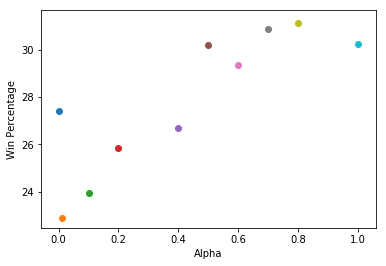

In [11]:
plt.xlabel("Alpha")
plt.ylabel("Win Percentage")
for i in range(10):
    plt.scatter(alpha_cases[i],alpha_wins[i])

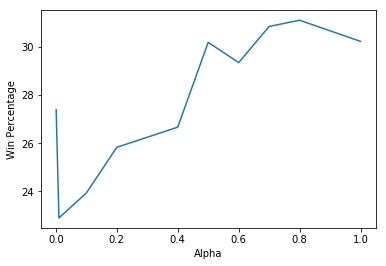

In [12]:
plt.xlabel("Alpha")
plt.ylabel("Win Percentage")
plt.plot(alpha_cases,alpha_wins)

In [13]:
no_of_cases = [0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,1]
wins = []
gamma = []

env_gamma = BlackjackEnv()
player1_gamma = Player('Dhananjay')
env_gamma.add_player(player1_gamma)
agent_gamma = RLAgent(env_gamma)

for i in range(len(no_of_cases)):
    rtrace,trace = agent_gamma.train(player1_gamma, gamma=no_of_cases[i])  
    rtrace_test, trace_test, win = agent_gamma.test()
    
    wins.append(win)
    gamma.append(no_of_cases[i])
    print("Gamma: "+str(no_of_cases[i])+"\tWin Percentage: "+str(win))

Gamma: 0.001	Win Percentage: 25.334182049649904
Gamma: 0.01	Win Percentage: 28.21497120921305
Gamma: 0.1	Win Percentage: 24.44973230220107
Gamma: 0.2	Win Percentage: 25.342058298631766
Gamma: 0.4	Win Percentage: 23.49537037037037
Gamma: 0.5	Win Percentage: 23.563892145369284
Gamma: 0.6	Win Percentage: 24.178549287042777
Gamma: 0.7	Win Percentage: 23.229291716686674
Gamma: 0.8	Win Percentage: 23.273360417875796
Gamma: 1	Win Percentage: 22.899408284023668


In [14]:
gamma_cases = no_of_cases
gamma_wins = wins

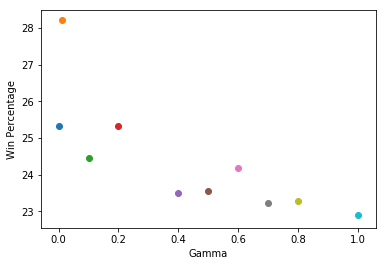

In [15]:
plt.xlabel("Gamma")
plt.ylabel("Win Percentage")
for i in range(10):
    plt.scatter(gamma_cases[i],gamma_wins[i])

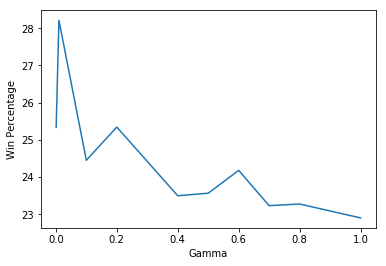

In [16]:
plt.xlabel("Gamma")
plt.ylabel("Win Percentage")
plt.plot(gamma_cases,gamma_wins)

In [17]:
no_of_cases = [0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,1]
wins = []
epsilon = []

env_epsilon = BlackjackEnv()
player1_epsilon = Player('Dhananjay')
env_epsilon.add_player(player1_epsilon)
agent_epsilon = RLAgent(env_epsilon)

for i in range(len(no_of_cases)):
    rtrace,trace = agent_epsilon.train(player1_epsilon, epsilon=no_of_cases[i])  
    rtrace_test, trace_test, win = agent_epsilon.test()
    
    wins.append(win)
    epsilon.append(no_of_cases[i])
    print("epsilon: "+str(no_of_cases[i])+"\tWin Percentage: "+str(win))

epsilon: 0.001	Win Percentage: 22.580645161290324
epsilon: 0.01	Win Percentage: 21.746575342465754
epsilon: 0.1	Win Percentage: 23.682579045257285
epsilon: 0.2	Win Percentage: 26.170798898071624
epsilon: 0.4	Win Percentage: 28.140013726835964
epsilon: 0.5	Win Percentage: 25.910931174089068
epsilon: 0.6	Win Percentage: 27.822878228782287
epsilon: 0.7	Win Percentage: 29.499626587005228
epsilon: 0.8	Win Percentage: 26.890156918687588
epsilon: 1	Win Percentage: 29.424778761061948


In [18]:
epsilon_cases = no_of_cases
epsilon_wins = wins

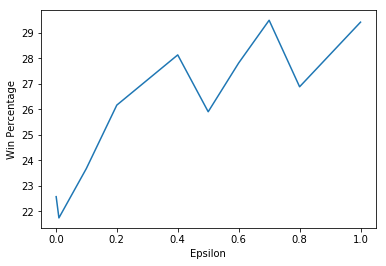

In [19]:
plt.xlabel("Epsilon")
plt.ylabel("Win Percentage")
plt.plot(epsilon_cases,epsilon_wins)

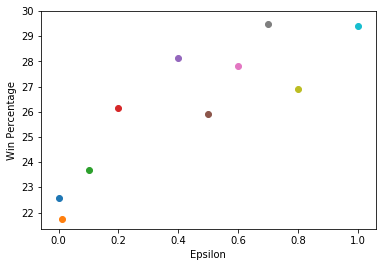

In [20]:
plt.xlabel("Epsilon")
plt.ylabel("Win Percentage")
for i in range(10):
    plt.scatter(epsilon_cases[i],epsilon_wins[i])

In [21]:
no_of_cases = [100,200,300,400,500,600,700,1000,2000,3000]
wins = []
maxiter = []

env_maxiter = BlackjackEnv()
player1_maxiter = Player('Dhananjay')
env_maxiter.add_player(player1_maxiter)
agent_maxiter = RLAgent(env_maxiter)

for i in range(len(no_of_cases)):
    rtrace,trace = agent_maxiter.train(player1_maxiter, maxiter=no_of_cases[i])  
    rtrace_test, trace_test, win = agent_maxiter.test()
    
    wins.append(win)
    maxiter.append(no_of_cases[i])
    print("maxiter: "+str(no_of_cases[i])+"\tWin Percentage: "+str(win))

maxiter: 100	Win Percentage: 25.74385510996119
maxiter: 200	Win Percentage: 22.61761158021713
maxiter: 300	Win Percentage: 20.69954128440367
maxiter: 400	Win Percentage: 19.460390355912743
maxiter: 500	Win Percentage: 22.164651698330456
maxiter: 600	Win Percentage: 24.833029751062536
maxiter: 700	Win Percentage: 25.078173858661664
maxiter: 1000	Win Percentage: 22.93577981651376
maxiter: 2000	Win Percentage: 26.4426125554851
maxiter: 3000	Win Percentage: 25.703324808184142


In [22]:
maxiter_cases = no_of_cases
maxiter_wins = wins

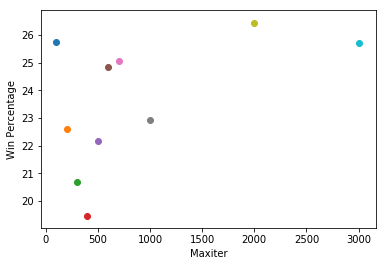

In [23]:
plt.xlabel("Maxiter")
plt.ylabel("Win Percentage")
for i in range(10):
    plt.scatter(maxiter_cases[i],maxiter_wins[i])

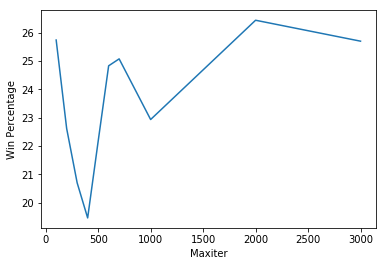

In [24]:
plt.xlabel("Maxiter")
plt.ylabel("Win Percentage")
plt.plot(maxiter_cases,maxiter_wins)

In [25]:
no_of_cases = [100,200,300,400,500,600,700,1000,2000,3000]
wins = []
maxstep = []

env_maxstep = BlackjackEnv()
player1_maxstep = Player('Dhananjay')
env_maxstep.add_player(player1_maxstep)
agent_maxstep = RLAgent(env_maxstep)

for i in range(len(no_of_cases)):
    rtrace,trace = agent_maxstep.train(player1_maxstep, maxstep=no_of_cases[i])  
    rtrace_test, trace_test, win = agent_maxstep.test()
    
    wins.append(win)
    maxstep.append(no_of_cases[i])
    print("MaxStep: "+str(no_of_cases[i])+"\tWin Percentage: "+str(win))

MaxStep: 100	Win Percentage: 20.141342756183747
MaxStep: 200	Win Percentage: 21.009389671361504
MaxStep: 300	Win Percentage: 25.40106951871658
MaxStep: 400	Win Percentage: 27.02156334231806
MaxStep: 500	Win Percentage: 24.48849104859335
MaxStep: 600	Win Percentage: 27.272727272727273
MaxStep: 700	Win Percentage: 24.333116460637605
MaxStep: 1000	Win Percentage: 23.581336696090794
MaxStep: 2000	Win Percentage: 25.473546701502286
MaxStep: 3000	Win Percentage: 24.173027989821882


In [26]:
maxstep_cases = no_of_cases
maxstep_wins = wins

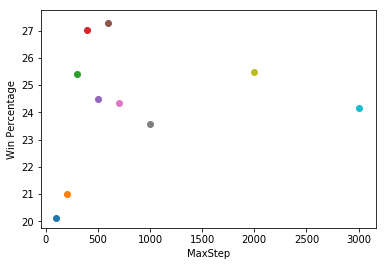

In [27]:
plt.xlabel("MaxStep")
plt.ylabel("Win Percentage")
for i in range(10):
    plt.scatter(maxstep_cases[i],maxstep_wins[i])

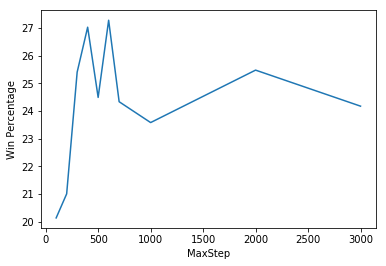

In [28]:
plt.xlabel("MaxStep")
plt.ylabel("Win Percentage")
plt.plot(maxstep_cases,maxstep_wins)

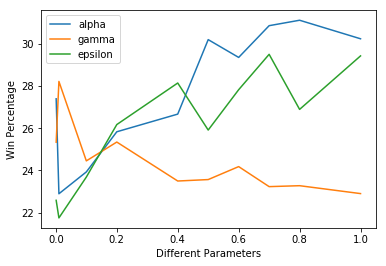

In [35]:
plt.ylabel("Win Percentage")
plt.xlabel("Different Parameters")
plt.plot(alpha_cases,alpha_wins,label="alpha")
plt.plot(gamma_cases,gamma_wins,label="gamma")
plt.plot(epsilon_cases,epsilon_wins,label="epsilon")
plt.legend()

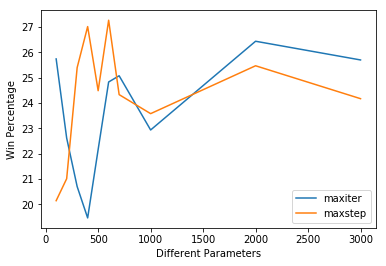

In [36]:
plt.ylabel("Win Percentage")
plt.xlabel("Different Parameters")
plt.plot(maxiter_cases,maxiter_wins,label="maxiter")
plt.plot(maxstep_cases,maxstep_wins,label="maxstep")
plt.legend()

**Reporting the selected parameters**

Below is the list of best win percentage along with the parameters:
<table>
    <tr>
        <td>Alpha: 0.7</td>	
        <td>Win Percentage: 30.85</td>
    </tr>
    <tr>
        <td>Gamma: 0.01</td>	
        <td>Win Percentage: 28.21</td>
    </tr>
    <tr>
        <td>Epsilon: 0.7</td>	
        <td>Win Percentage: 29.49</td>
    </tr>
    <tr>
        <td>Maxiter: 100</td>	
        <td>Win Percentage: 25.74</td>
    </tr>
    <tr>
        <td>MaxStep: 600</td>	
        <td>Win Percentage: 27.27</td>
    </tr>
</table>

Chose the parameters and extracted the best value from all. So, final values are above.
- Alpha and Epsilon performed best when value was 0.7
- Maxiter should be 100 and maxstep should be 600.
- Gamma value should be 0.01

## Below is the final combination of best parameter values and the win percentage

In [53]:
env_final = BlackjackEnv()
player1f = Player('Dhananjay')
env_final.add_player(player1f)
agent_final =  RLAgent(env)

Training and testing the RL agent for final time as below.

In [54]:
rtrace_final, trace_final = agent_final.train(player1, alpha = 0.7, gamma = 0.01, epsilon = 0.7, maxiter= 100, maxstep = 600)
rtrace_test_final, trace_test_final, win_final = agent_final.test()

The final Win Percentage came out to be 29.31, seen as below:

In [55]:
print(win_final)

29.31286549707602


Graph has already been plotted above.

### Reading and analysis of learning results and plots

- Overall, win percentage with respect to Alpha value increases as we go from 0 to 1.
- Highest win percentage with respect to Alpha value(0.7) is 30.85
- Overall, win percentage with respect to Gamma value decreases as we go from 0 to 1.
- Highest win percentage with respect to Gamma value(0.01) is 28.21
- Overall, win percentage with respect to Epsilon value increases as we go from 0 to 1.
- Highest win percentage with respect to Epsilon value(0.7) is 29.49
- Overall, win percentage with respect to Maxiter value increases as well as decreases as we go from 100 to 3000.
- Highest win percentage with respect to Maxiter value(100) is 25.74
- Overall, win percentage with respect to MaxStep value increases as well as decreases as we go from 100 to 3000.
- Highest win percentage with respect to MaxStep value(600) is 27.27

On the basis of above observations, we have chosen the best parameter values and this justifies the overall performance of the RL agent.

# Participation to the tournament.

I will participate in the tournament and will compete in class.

# V. Conclusions

- Reinforcement learning is a type of Machine Learning algorithms which allows software agents and machines to automatically determine the ideal behavior within a specific context, to maximize its performance.
- Reinforcement algorithms are not given explicit goals; instead, they are forced to learn these optimal goals by trial and error. 
- I would like to conclude by stating that it is a very interesting assignment.
- I learned how to create a RL agent.
- Tried 5 different parameters and got the different results.
- Assignment was completed successfully.

**Suggestion:**
This is a tough assignment and should have some less writing part. It is very exhausting but got to learn several things.

# REFERENCES

[1] Ian Goodfellow and Yoshua Bengio and Aaron Courville. "Deep Learning", MIT Press, 2016, http://www.deeplearningbook.org

[2] "Reinforcement learning”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/Reinforcement_learning

[3] Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

[4] Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

[5] Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html

[6] DanB, "Handling Missing Values", Kaggle, Data Repository, https://www.kaggle.com/dansbecker/handling-missing-values

[7] "SARSA”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/State%E2%80%93action%E2%80%93reward%E2%80%93state%E2%80%93action

[8] "Q-learning”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/Q-learning

[9] Mohammed Sunasra, "Performance Metrics for Classification problems in Machine Learning", Thalus, Medium(2017), https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b